In [78]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

#read in the data
df = pd.read_csv(r"C:\Users\admin\Downloads\movies.csv")

In [79]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [80]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, (pct_missing)))
#     print(f"{col}-{pct_missing}%")

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [81]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [82]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce', downcast='integer')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce', downcast='integer')

In [83]:
df = df.sort_index(axis=1)
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


In [84]:
df['year_correct'] = df['released'].astype(str).str[:4]
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,June
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,July
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,June
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,July
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,July


In [85]:
df.sort_values(by = ['gross'], inplace = False, ascending = False)
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,June
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,July
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,June
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,July
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,July


In [86]:
pd.set_option('display.max_rows', 20)

In [87]:
#Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending = False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

In [88]:
df['company'].drop_duplicates()

0              Warner Bros.
1         Columbia Pictures
2                 Lucasfilm
3        Paramount Pictures
4            Orion Pictures
               ...         
7658           Notis Studio
7660    Abominable Pictures
7661         Dow Jazz Films
7665       Embi Productions
7667            PK 65 Films
Name: company, Length: 2386, dtype: object

In [89]:
# Budget high correlation
# company high correlation

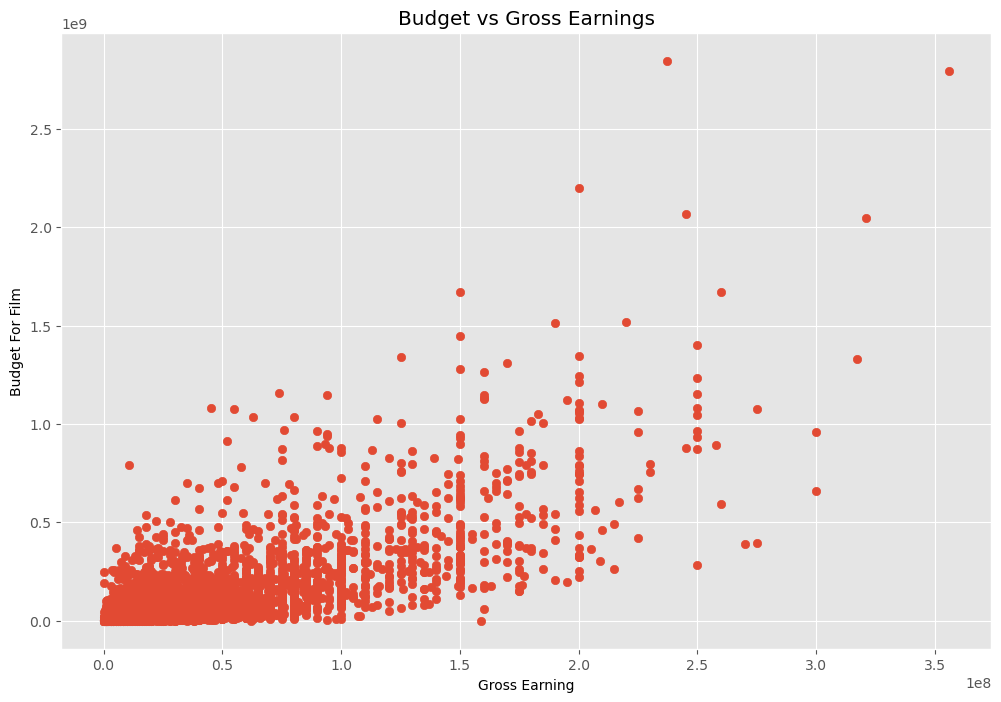

In [90]:
#Scatter plot with budget vs gross
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel("Gross Earning")
plt.ylabel("Budget For Film")
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

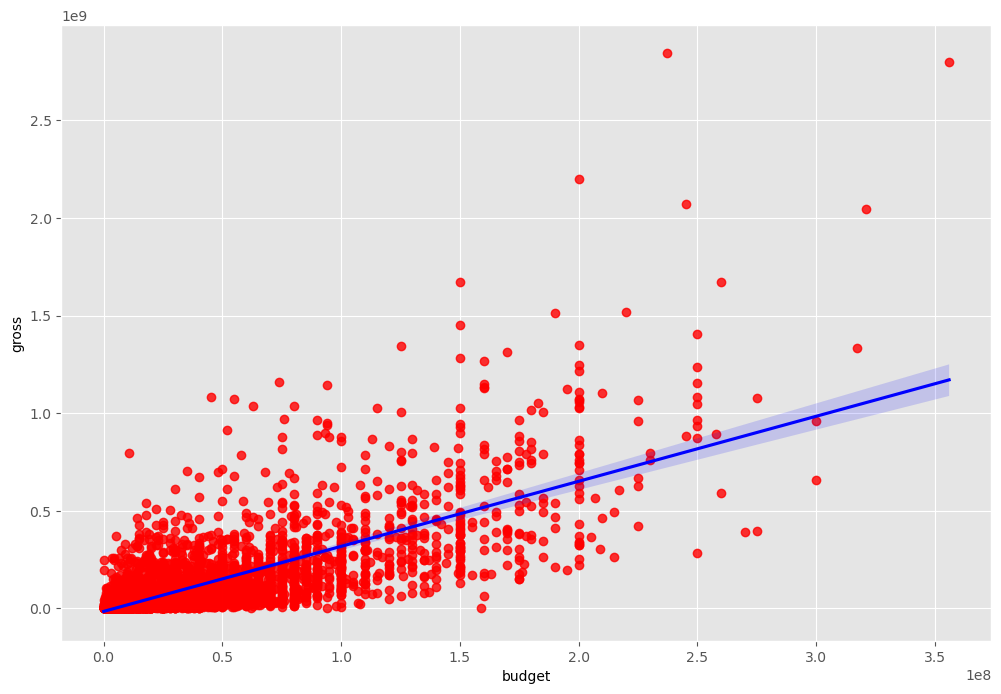

In [91]:
# plot the budget vs gross using seaborn
sns.regplot(x='budget', y ='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [92]:
# Let's start Looking at correlation

In [93]:
df.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_11672\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,budget,gross,runtime,score,votes,year
budget,1.000000,0.740395,0.320447,0.076254,0.442429,0.329321
gross,0.740395,1.000000,0.245216,0.186258,0.630757,0.257486
runtime,0.320447,0.245216,1.000000,0.399451,0.309212,0.120811
score,0.076254,0.186258,0.399451,1.000000,0.409182,0.097995
votes,0.442429,0.630757,0.309212,0.409182,1.000000,0.222945
year,0.329321,0.257486,0.120811,0.097995,0.222945,1.000000


In [94]:
df.corr(method='pearson')

C:\Users\admin\AppData\Local\Temp\ipykernel_11672\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,budget,gross,runtime,score,votes,year
budget,1.000000,0.740395,0.320447,0.076254,0.442429,0.329321
gross,0.740395,1.000000,0.245216,0.186258,0.630757,0.257486
runtime,0.320447,0.245216,1.000000,0.399451,0.309212,0.120811
score,0.076254,0.186258,0.399451,1.000000,0.409182,0.097995
votes,0.442429,0.630757,0.309212,0.409182,1.000000,0.222945
year,0.329321,0.257486,0.120811,0.097995,0.222945,1.000000


In [95]:
df.corr(method='kendall')

C:\Users\admin\AppData\Local\Temp\ipykernel_11672\1723791258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='kendall')


,budget,gross,runtime,score,votes,year
budget,1.000000,0.512637,0.235483,-0.000566,0.353702,0.224120
gross,0.512637,1.000000,0.168933,0.086046,0.548899,0.200618
runtime,0.235483,0.168933,1.000000,0.283611,0.198240,0.097184
score,-0.000566,0.086046,0.283611,1.000000,0.300115,0.067652
votes,0.353702,0.548899,0.198240,0.300115,1.000000,0.331465
year,0.224120,0.200618,0.097184,0.067652,0.331465,1.000000


In [96]:
# correlation b/w budget and gross is high

C:\Users\admin\AppData\Local\Temp\ipykernel_11672\2210907907.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


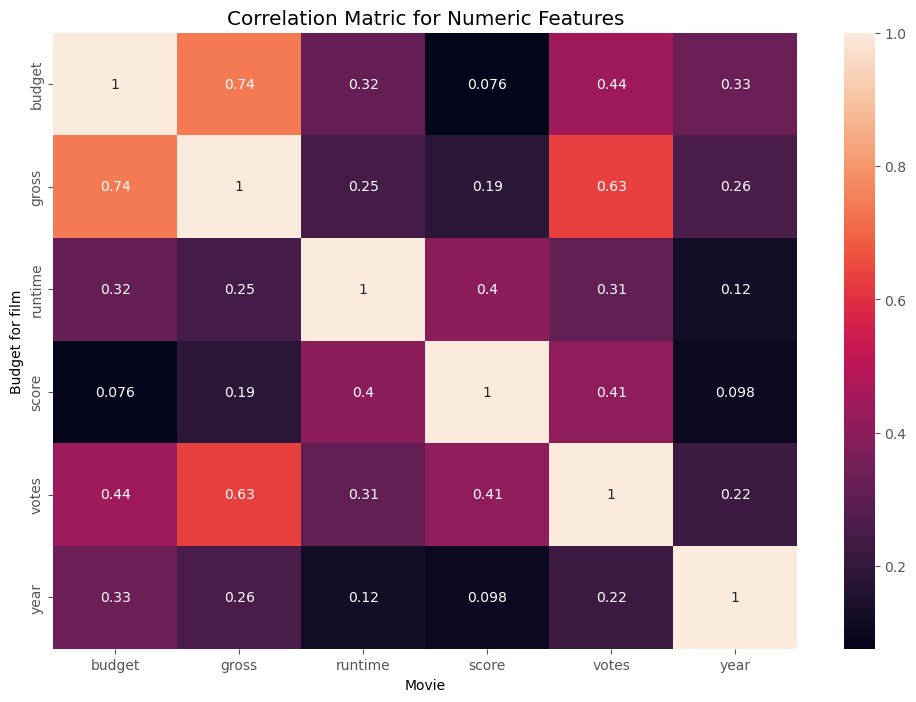

In [97]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie')

plt.ylabel('Budget for film')
plt.show()

In [98]:
#Looks at company
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,June
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,July
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,June
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,July
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,July


In [99]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
0,19000000.0,2319,54,2589,6,46998772.0,6587,6,1705,146.0,8.4,1047,927000.0,4014,1980,14
1,4500000.0,731,55,2269,1,58853106.0,5573,6,1492,104.0,5.8,327,65000.0,1632,1980,13
2,18000000.0,1540,55,1111,0,538375067.0,5142,4,1771,124.0,8.7,1745,1200000.0,2567,1980,14
3,3500000.0,1812,55,1301,4,83453539.0,286,4,1492,88.0,7.7,2246,221000.0,2000,1980,13
4,6000000.0,1777,55,1054,4,39846344.0,1027,6,1543,98.0,7.3,410,108000.0,521,1980,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000.0,-1,55,1500,6,NaN,3705,-1,2964,90.0,3.1,2421,18.0,2289,2020,18
7664,NaN,539,55,774,4,NaN,1678,-1,1107,90.0,4.7,1886,36.0,2614,2020,11
7665,58750.0,941,55,2061,6,NaN,4717,-1,193,NaN,5.7,2040,29.0,2683,2020,8
7666,15000.0,-1,55,1184,6,NaN,2843,-1,2817,120.0,NaN,450,NaN,1824,2020,18


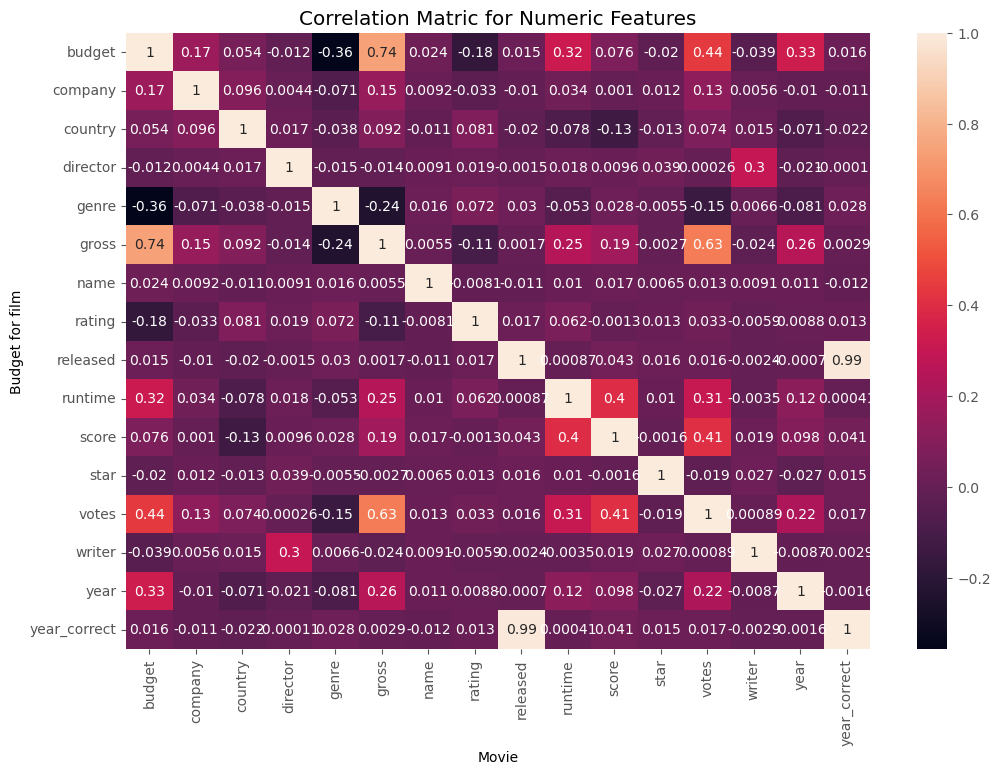

In [100]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie')

plt.ylabel('Budget for film')
plt.show()

In [101]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
budget,1.000000,0.173214,0.054063,-0.012272,-0.356564,0.740395,0.023970,-0.176002,0.014683,0.320447,0.076254,-0.019589,0.442429,-0.039451,0.329321,0.015682
company,0.173214,1.000000,0.095548,0.004404,-0.071067,0.154840,0.009211,-0.032943,-0.010474,0.034402,0.001030,0.012442,0.133204,0.005646,-0.010431,-0.010726
country,0.054063,0.095548,1.000000,0.017490,-0.037615,0.092129,-0.010737,0.081244,-0.020427,-0.078412,-0.133348,-0.012998,0.073625,0.015343,-0.070938,-0.022277
director,-0.012272,0.004404,0.017490,1.000000,-0.015258,-0.014441,0.009079,0.019483,-0.001478,0.017624,0.009559,0.039234,0.000260,0.299067,-0.020795,-0.000105
genre,-0.356564,-0.071067,-0.037615,-0.015258,1.000000,-0.235650,0.016355,0.072423,0.029822,-0.052711,0.027965,-0.005477,-0.145307,0.006567,-0.081261,0.028397
gross,0.740395,0.154840,0.092129,-0.014441,-0.235650,1.000000,0.005533,-0.107339,0.001659,0.245216,0.186258,-0.002717,0.630757,-0.023519,0.257486,0.002946
name,0.023970,0.009211,-0.010737,0.009079,0.016355,0.005533,1.000000,-0.008069,-0.011311,0.010392,0.017097,0.006472,0.013088,0.009081,0.011453,-0.011725
rating,-0.176002,-0.032943,0.081244,0.019483,0.072423,-0.107339,-0.008069,1.000000,0.016613,0.062145,-0.001314,0.013405,0.033225,-0.005921,0.008779,0.013475
released,0.014683,-0.010474,-0.020427,-0.001478,0.029822,0.001659,-0.011311,0.016613,1.000000,0.000868,0.042788,0.015777,0.016097,-0.002404,-0.000695,0.993694
runtime,0.320447,0.034402,-0.078412,0.017624,-0.052711,0.245216,0.010392,0.062145,0.000868,1.000000,0.399451,0.010174,0.309212,-0.003511,0.120811,0.000410


In [102]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget        budget          1.000000
              company         0.173214
              country         0.054063
              director       -0.012272
              genre          -0.356564
                                ...   
year_correct  star            0.015406
              votes           0.017337
              writer         -0.002892
              year           -0.001562
              year_correct    1.000000
Length: 256, dtype: float64

In [103]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.356564
budget        genre          -0.356564
gross         genre          -0.235650
genre         gross          -0.235650
budget        rating         -0.176002
                                ...   
director      director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
year_correct  year_correct    1.000000
Length: 256, dtype: float64

In [104]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes         gross           0.630757
gross         votes           0.630757
budget        gross           0.740395
gross         budget          0.740395
released      year_correct    0.993694
                                ...   
director      director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
year_correct  year_correct    1.000000
Length: 22, dtype: float64

In [105]:
# Votes and budget have the highest correaltion to the gross earning

# Company has low correlation

In [113]:
import os
os.getcwd()

'C:\\Users\\admin'